# Capstone Project for Sentiment based product recommender system for Ebuss

## Importing necessary libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter

# Importing the libraries for NLP
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

#models used
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances

# to address imbalance in data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler





[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bgadhiwala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bgadhiwala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bgadhiwala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#!pip install imblearn
#!pip install xgboost

Reading the input file sample30.csv in a dataframe

In [3]:
df=pd.read_csv('sample30.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [5]:
df.tail()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive
29999,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-19T00:00:00.000Z,False,True,5,I received this product complimentary from inf...,Conditioned into healthy,NaN,NaN,kcoopxoxo,Positive


In [6]:
df.shape

(30000, 15)

In [7]:
df.describe()
#As we can see in the describe method, only reviews_rating is the numerical column, all other columns are categorical as given

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [9]:
len(df.id.unique())
## there are 271 unique products

271

In [10]:
len(df.reviews_username.unique())
# The number of users or reviewers in the dataset are 24915 out of total 30000 rows. This shows the each user may have put few reviews

24915

### Checking for null values

In [11]:
# Percent missing values calculations
# This shows that the reviews_userProvince and reviews_userCity columns are of no use as they have 99.43% and 93.57% missing values
# We shall remove these columns from further study.
# Also, the column reviews_didPurchase has 47% null values
((df.isna().sum()/len(df)).round(4)*100).sort_values(ascending=False)

reviews_userProvince    99.43
reviews_userCity        93.57
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_title            0.63
manufacturer             0.47
reviews_username         0.21
reviews_date             0.15
id                       0.00
brand                    0.00
categories               0.00
name                     0.00
reviews_rating           0.00
reviews_text             0.00
user_sentiment           0.00
dtype: float64

In [12]:
df.isna().sum().sort_values(ascending=False)

reviews_userProvince    29830
reviews_userCity        28071
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_title             190
manufacturer              141
reviews_username           63
reviews_date               46
user_sentiment              1
id                          0
brand                       0
categories                  0
name                        0
reviews_rating              0
reviews_text                0
dtype: int64

### Checking for duplicates

In [13]:
df.duplicated(subset=['id', 'name', 'reviews_username','reviews_rating']).sum()
# There are 2237 rows in the data that are duplicate values. This will be removed during data cleaning.

2237

In [14]:
# Checking the duplicate rows in detail
df.loc[df.duplicated(subset=['id', 'name', 'reviews_username','reviews_rating']),:]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
12,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-08T00:00:00.000Z,False,False,1,"Bought this to enhance our time a bit, did abs...",waste of money,NaN,NaN,jds1992,Negative
44,AV1h6Gu0glJLPUi8IjA_,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2017-05-09T00:00:00.000Z,False,True,4,"Well, Johnson's need I say more I know, right....",2 in 1!!!,NaN,NaN,solo,Positive
79,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-04-30T00:00:00.000Z,False,True,3,Today is my first time using this product. Fel...,Why No fragrance-free Formula,NaN,NaN,mylifeinheels,Positive
90,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-04-30T03:08:38.000Z,NaN,True,3,Today is my first time using this product. Fel...,Why No Fragrance-free Formula,Brooklyn,NaN,mylifeinheels,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29807,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2016-12-30T00:00:00.000Z,False,NaN,5,I received this product from Influenster in ex...,Smooth and silky!,NaN,NaN,joycakes,Positive
29827,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-04T00:00:00.000Z,False,True,5,This works great to make my hair shiny and hea...,Really hydrates!,NaN,NaN,emily95,Positive
29841,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2016-12-29T00:00:00.000Z,False,True,5,I received this product free from influenster ...,Good stuff,NaN,NaN,brookieboo1994,Positive
29921,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,This stuff is so hydrating and it smells so am...,Smells so freaking good!,NaN,NaN,talmariejohn,Positive


In [15]:
# Checking an example user for duplicates. This appears to be exact same datathat the user has entered and submitted twice. 
#These rows will be dropped during data cleaning process.
df[df.reviews_username=='talmariejohn']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
29670,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:43:58.000Z,NaN,True,5,This stuff is so hydrating and it smells so am...,Smells So Freaking Good!,NaN,NaN,talmariejohn,Positive
29921,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,This stuff is so hydrating and it smells so am...,Smells so freaking good!,NaN,NaN,talmariejohn,Positive


Null values in reviews_didPurchase :  14068
True values in reviews_didPurchase :  1434
False values in reviews_didPurchase :  14498


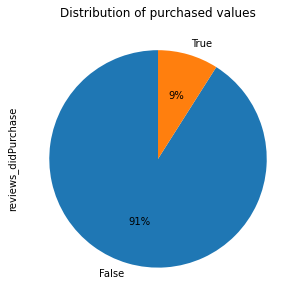

In [16]:
# Let us explore the columns reviews_didPurchase vs reviews_doRecommand 

print( 'Null values in reviews_didPurchase : ',len(df[df.reviews_didPurchase.isna()]))
print( 'True values in reviews_didPurchase : ',len(df[df.reviews_didPurchase==True]))
print( 'False values in reviews_didPurchase : ',len(df[df.reviews_didPurchase==False]))
df.reviews_didPurchase.value_counts().plot.pie(figsize=(5,5),startangle=90,autopct = '%1.0f%%')
plt.title('Distribution of purchased values')
plt.show()

Null values in reviews_doRecommend :  2570
True values in reviews_doRecommend :  25880
False values in reviews_doRecommend :  1550


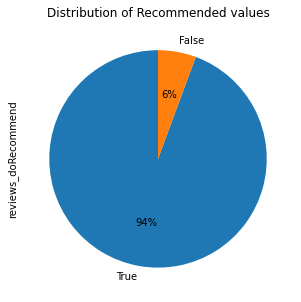

In [17]:
print( 'Null values in reviews_doRecommend : ',len(df[df.reviews_doRecommend.isna()]))
print( 'True values in reviews_doRecommend : ',len(df[df.reviews_doRecommend==True]))
print( 'False values in reviews_doRecommend : ',len(df[df.reviews_doRecommend==False]))
df.reviews_doRecommend.value_counts().plot.pie(figsize=(5,5),startangle=90,autopct = '%1.0f%%')
plt.title('Distribution of Recommended values')
plt.show()

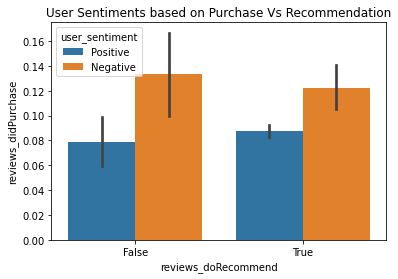

In [18]:
plt.title('User Sentiments based on Purchase Vs Recommendation')
sns.barplot(x='reviews_doRecommend',y='reviews_didPurchase',hue='user_sentiment',data=df)
plt.show();

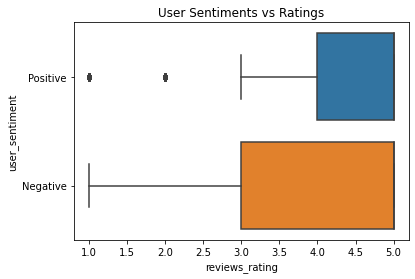

In [19]:
plt.title('User Sentiments vs Ratings')
sns.boxplot(x='reviews_rating',y='user_sentiment',data=df)
plt.show();

In [20]:
df[df.user_sentiment.isna()]
# Only one row has user_sentiment as null. Let's explore that row
# It is a positive sentiment. We will create the feature column in such a way that all non-negative sentiments will be considered as positive ones.

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


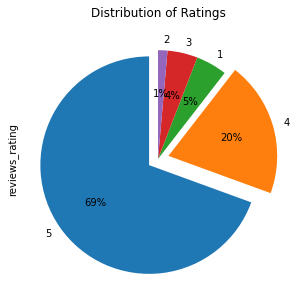

In [21]:

df.reviews_rating.value_counts().plot.pie(figsize=(5,5),startangle=90,autopct = '%1.0f%%',explode = (0.1, 0.1, 0,0,0))
plt.title('Distribution of Ratings')
plt.show()

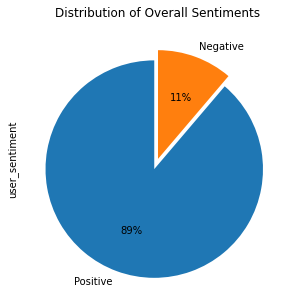

In [22]:
df.user_sentiment.value_counts().plot.pie(figsize=(5,5),startangle=90,autopct = '%1.0f%%',explode = (0.1,0))
plt.title('Distribution of Overall Sentiments')
plt.show()

In [23]:
(df.reviews_rating.value_counts())

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [24]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [25]:
df.reviews_didPurchase.value_counts()


False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

In [26]:
df.reviews_doRecommend.value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

In [27]:
len(df.reviews_username.unique())

24915

## Observations


*   The given dataset has 30000 rows and 15 columns
*   Only reviews_rating is the numerical column. Here the mean value is 4.48 which is more towards 5 that implies that the dataset is concentrated with more positive reviews
*   id is the product id column and name is the product name with that id
*   Since this is not a time series analysis, we do not need the reviews_date column. We shall drop that column from our analysis
*   The dataset is highly imbalanced towards the positive sentiments as observed from the user_sentiment column
*   The column reviews_doRecommend and reviews_didPurchase are not adding any value to the study. They will be disregarded.


## Data Cleaning
1.   Drop the columns that has more than 50% null values or the one that will not be used for the study. For example the timestamp column
2.   Drop the duplicate rows of same user + product combination keeping the last review of the user for that product
3.   Create a new feature to be used for sentiment analysis
4.   Save the clean dataframe to work on in the recommender sub project
5.   Remove the rows with no username information as it is of little value to us during recommendation and need not be considered for the sentiment analysis also



In [28]:
# 1. Dropping the columns that have more than 50% null values
df=df.drop(['reviews_userProvince', 'reviews_userCity', 'reviews_date', 'reviews_doRecommend', 'reviews_didPurchase'], axis=1)

In [29]:
# 2. Dropping the duplicate rows of same user+product combination keeping the last review of the user
df=df.drop_duplicates(subset=['reviews_username', 'id'], keep='last')

In [30]:
#3. Creating a new column called sent as concatenated field of reviews_title and reviews_text
df['sent']=df.reviews_title+' '+df.reviews_text

In [31]:
# 5. Removing the rows that has null values in the column reviews_username. We found there are 63 of such rows
df=df[~df['reviews_username'].isna()]

In [32]:
df.shape

(27588, 11)

In [33]:
df.to_csv('CapstoneCleanDataAfterEDA.csv', index=False)

In [34]:
df.to_csv('CapstoneCleanDataAfterEDA.csv', encoding='utf-8', index=False)

# Sentiment Analysis
We shall be doing the sentiment analysis of the new column created by concatenating the columns reviews_title and reviews_text. This is done because we observe that in a lot of cases, the title says a lot about the user sentiment. 

In [35]:
# Initialize the X and y variables for our sentiment analysis
X=df.sent
y=df.user_sentiment.apply(lambda x: 0 if x=='Negative' else 1)
X.head()

0    Just Awesome i love this album. it's very good...
2                                    Good Good flavor.
3    Disappointed I read through the reviews on her...
4    Irritation My husband bought this gel for us. ...
5    Not worth it My boyfriend and I bought this to...
Name: sent, dtype: object

In [36]:
y.value_counts()/len(y)*100

1    88.969842
0    11.030158
Name: user_sentiment, dtype: float64

89% of reviews are positive and 11% is only negative. Let us handle this data imbalance

In [37]:
X=X.values.reshape(-1,1);y=y.values.reshape(-1,1)

In [38]:
def clean_text(text):
  text = text.lower()
  pattern = re.compile('[\(\[].*?[\)\]]')
  text = re.sub(pattern, '', text)
  pattern = re.compile('[^\w\s]')
  text = re.sub(pattern, '', text)
  pattern = re.compile('[0-9]')
  text = re.sub(pattern, '', text)
  return text

In [39]:
def lemmatizer(text):      
    text = clean_text(text)  
    sent = [wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
    return " ".join(sent)

### Data Cleaning and Lemmatization

In [40]:
X_clean = pd.DataFrame()
X_clean['sentiment'] = df['reviews_text'].apply(lambda x: clean_text(x))
X_clean['lemmatized_sentiment'] = X_clean['sentiment'].apply(lambda x: lemmatizer(x))

In [41]:
X_clean.to_csv('X_clean_and_lemmatised_sentiments.csv', encoding='utf-8', index=False)

In [42]:
X_clean

,sentiment,lemmatized_sentiment
0,i love this album its very good more to the hi...,love album good hip hop side current pop sound...
2,good flavor,good flavor
3,i read through the reviews on here before look...,read review looking buying one couple lubrican...
4,my husband bought this gel for us the gel caus...,husband bought gel u gel caused irritation fel...
5,my boyfriend and i bought this to spice things...,boyfriend bought spice thing bedroom highly di...
...,...,...
29995,i got this conditioner with influenster to try...,got conditioner influenster try im loving far ...
29996,i love it i received this for review purposes...,love received review purpose influenster leaf ...
29997,first of all i love the smell of this product ...,first love smell product wash hair smooth easy...
29998,i received this through influenster and will n...,received influenster never go back anything el...


In [43]:
X=X_clean['lemmatized_sentiment']

In [44]:
X

0        love album good hip hop side current pop sound...
2                                              good flavor
3        read review looking buying one couple lubrican...
4        husband bought gel u gel caused irritation fel...
5        boyfriend bought spice thing bedroom highly di...
                               ...                        
29995    got conditioner influenster try im loving far ...
29996    love received review purpose influenster leaf ...
29997    first love smell product wash hair smooth easy...
29998    received influenster never go back anything el...
29999    received product complimentary influenster rea...
Name: lemmatized_sentiment, Length: 27588, dtype: object

### TF-IDF vectorization

In [45]:
# Create the word vector with TF-IDF Vectorizer

tfidf_vect = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stopwords.words('english'), # List of stopwords
                               ngram_range=(1,1))
X = tfidf_vect.fit_transform(X)


In [46]:

# Save the sentiment vectorizer model to file in the current working directory
pkl_filename = "Tfidf_vectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_vect, file)

# Load sentiment vectorizer model from file
with open(pkl_filename, 'rb') as file:
    pickled_tfidf_vect = pickle.load(file)

### Train test Split

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Trying models without addressing imbalance in target class

In [48]:
# LogisticRegression
logreg =  LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [49]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.25      0.39       561
           1       0.92      1.00      0.96      4957

    accuracy                           0.92      5518
   macro avg       0.89      0.63      0.68      5518
weighted avg       0.92      0.92      0.90      5518



In [50]:
xgb = XGBClassifier().fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_xgb))

[00:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       561
           1       0.96      0.97      0.97      4957

    accuracy                           0.94      5518
   macro avg       0.85      0.81      0.83      5518
weighted avg       0.94      0.94      0.94      5518



In [51]:
# Random Forest Model
rf = RandomForestClassifier(max_depth=10,random_state=0).fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [52]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       561
           1       0.90      1.00      0.95      4957

    accuracy                           0.90      5518
   macro avg       0.45      0.50      0.47      5518
weighted avg       0.81      0.90      0.85      5518



In [53]:
# Naive Bayes Model
nb=MultinomialNB().fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       561
           1       0.90      1.00      0.95      4957

    accuracy                           0.90      5518
   macro avg       0.45      0.50      0.47      5518
weighted avg       0.81      0.90      0.85      5518



### Random Over Sampling Technique

In [54]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [55]:
Counter(y_ros)

Counter({1: 19588, 0: 19588})

In [56]:
# LogisticRegression with Random Over Sampling
logreg_ros =  LogisticRegression()
logreg_ros.fit(X_ros, y_ros)

y_pred_logreg_ros = logreg_ros.predict(X_test)
print(classification_report(y_test, y_pred_logreg_ros))

              precision    recall  f1-score   support

           0       0.51      0.88      0.65       561
           1       0.99      0.90      0.94      4957

    accuracy                           0.90      5518
   macro avg       0.75      0.89      0.79      5518
weighted avg       0.94      0.90      0.91      5518



In [57]:
# XGB Classfier Model with Random Over Sampling

xgb_ros = XGBClassifier().fit(X_ros, y_ros)
y_pred_xgb_ros = xgb_ros.predict(X_test)
print(classification_report(y_test, y_pred_xgb_ros))

[00:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.53      0.84      0.65       561
           1       0.98      0.92      0.95      4957

    accuracy                           0.91      5518
   macro avg       0.76      0.88      0.80      5518
weighted avg       0.93      0.91      0.92      5518



In [58]:
# Random Forest Model with Random Over Sampling

rf_ros = RandomForestClassifier(max_depth=10,random_state=0).fit(X_ros, y_ros)
y_pred_rf_ros = rf_ros.predict(X_test)
print(classification_report(y_test, y_pred_rf_ros))

              precision    recall  f1-score   support

           0       0.32      0.84      0.46       561
           1       0.98      0.80      0.88      4957

    accuracy                           0.80      5518
   macro avg       0.65      0.82      0.67      5518
weighted avg       0.91      0.80      0.84      5518



In [59]:
# Naive Bayes Model with Random Over Sampling

nb_ros=MultinomialNB().fit(X_ros, y_ros)
y_pred_nb_ros=nb.predict(X_test)
print(classification_report(y_test, y_pred_nb_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       561
           1       0.90      1.00      0.95      4957

    accuracy                           0.90      5518
   macro avg       0.45      0.50      0.47      5518
weighted avg       0.81      0.90      0.85      5518



### Random Under Sampling technique

In [60]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X_train, y_train)


In [61]:
len(y_rus)

4964

In [62]:
# LogisticRegression with Random Under Sampling
logreg_rus =  LogisticRegression()
logreg_rus.fit(X_rus, y_rus)
y_pred_logreg_rus = logreg_rus.predict(X_test)
print(classification_report(y_test, y_pred_logreg_rus))

              precision    recall  f1-score   support

           0       0.35      0.92      0.50       561
           1       0.99      0.81      0.89      4957

    accuracy                           0.82      5518
   macro avg       0.67      0.86      0.70      5518
weighted avg       0.92      0.82      0.85      5518



In [63]:
# XGB Classfier Model with Random Under Sampling

xgb_rus = XGBClassifier().fit(X_rus, y_rus)
y_pred_xgb_rus = xgb_rus.predict(X_test)
print(classification_report(y_test, y_pred_xgb_rus))

[00:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.42      0.91      0.57       561
           1       0.99      0.86      0.92      4957

    accuracy                           0.86      5518
   macro avg       0.70      0.88      0.75      5518
weighted avg       0.93      0.86      0.88      5518



In [64]:
# Random Forest Model with Random Under Sampling

rf_rus = RandomForestClassifier(max_depth=10,random_state=0).fit(X_rus, y_rus)
y_pred_rf_rus = rf_rus.predict(X_test)
print(classification_report(y_test, y_pred_rf_rus))

              precision    recall  f1-score   support

           0       0.32      0.85      0.47       561
           1       0.98      0.80      0.88      4957

    accuracy                           0.80      5518
   macro avg       0.65      0.82      0.67      5518
weighted avg       0.91      0.80      0.84      5518



In [65]:
# Naive Bayes Model with Random Under Sampling

nb_rus=MultinomialNB().fit(X_rus, y_rus)
y_pred_nb_rus=nb.predict(X_test)
print(classification_report(y_test, y_pred_nb_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       561
           1       0.90      1.00      0.95      4957

    accuracy                           0.90      5518
   macro avg       0.45      0.50      0.47      5518
weighted avg       0.81      0.90      0.85      5518



In [66]:
# create table to show the comparative study
results = pd.DataFrame({'Method':['Logistic Regression']
                        , 'Imbalance technique': ['None']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_logreg)]
                        , 'Recall': [recall_score(y_test, y_pred_logreg)]
                        , 'f1-score': [f1_score(y_test, y_pred_logreg)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_logreg)]})
tempResults = pd.DataFrame({'Method':['XGB Classifier']
                        , 'Imbalance technique': ['None']
                        , 'Accuracy': [accuracy_score(y_test, y_xgb)]
                        , 'Recall': [recall_score(y_test, y_xgb)]
                        , 'f1-score': [f1_score(y_test, y_xgb)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_xgb)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Random Forest Model']
                        , 'Imbalance technique': ['None']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_rf)]
                        , 'Recall': [recall_score(y_test, y_pred_rf)]
                        , 'f1-score': [f1_score(y_test, y_pred_rf)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_rf)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Naive Bayes']
                        , 'Imbalance technique': ['None']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_nb)]
                        , 'Recall': [recall_score(y_test, y_pred_nb)]
                        , 'f1-score': [f1_score(y_test, y_pred_nb)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_nb)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Logistic Regression']
                        , 'Imbalance technique': ['Random Over Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_logreg_ros)]
                        , 'Recall': [recall_score(y_test, y_pred_logreg_ros)]
                        , 'f1-score': [f1_score(y_test, y_pred_logreg_ros)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_logreg_ros)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['XGB Classifier']
                        , 'Imbalance technique': ['Random Over Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_xgb_ros)]
                        , 'Recall': [recall_score(y_test, y_pred_xgb_ros)]
                        , 'f1-score': [f1_score(y_test, y_pred_xgb_ros)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_xgb_ros)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Random Forest Model']
                        , 'Imbalance technique': ['Random Over Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_rf_ros)]
                        , 'Recall': [recall_score(y_test, y_pred_rf_ros)]
                        , 'f1-score': [f1_score(y_test, y_pred_rf_ros)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_rf_ros)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Naive Bayes']
                        , 'Imbalance technique': ['Random Over Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_nb_ros)]
                        , 'Recall': [recall_score(y_test, y_pred_nb_ros)]
                        , 'f1-score': [f1_score(y_test, y_pred_nb_ros)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_nb_ros)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Logistic Regression']
                        , 'Imbalance technique': ['Random Under Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_logreg_rus)]
                        , 'Recall': [recall_score(y_test, y_pred_logreg_rus)]
                        , 'f1-score': [f1_score(y_test, y_pred_logreg_rus)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_logreg_rus)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['XGB Classifier']
                        , 'Imbalance technique': ['Random Under Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_xgb_rus)]
                        , 'Recall': [recall_score(y_test, y_pred_xgb_rus)]
                        , 'f1-score': [f1_score(y_test, y_pred_xgb_rus)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_xgb_rus)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Random Forest Model']
                        , 'Imbalance technique': ['Random Under Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_rf_rus)]
                        , 'Recall': [recall_score(y_test, y_pred_rf_rus)]
                        , 'f1-score': [f1_score(y_test, y_pred_rf_rus)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_rf_rus)]})
results = pd.concat([results, tempResults])
tempResults = pd.DataFrame({'Method':['Naive Bayes']
                        , 'Imbalance technique': ['Random Under Sampling']
                        , 'Accuracy': [accuracy_score(y_test, y_pred_nb_rus)]
                        , 'Recall': [recall_score(y_test, y_pred_nb_rus)]
                        , 'f1-score': [f1_score(y_test, y_pred_nb_rus)]
                        , 'ROCAUC': [roc_auc_score(y_test, y_pred_nb_rus)]})
results = pd.concat([results, tempResults])
results = results[['Method', 'Imbalance technique', 'Accuracy', 'Recall','ROCAUC' ]]


### Table of Comparative study of Sentiment analysis with and without handling imbalance with result metrics

In [67]:
results

,Method,Imbalance technique,Accuracy,Recall,ROCAUC
0,Logistic Regression,None,0.920080,0.995360,0.625131
0,XGB Classifier,None,0.940739,0.973976,0.810518
0,Random Forest Model,None,0.898333,1.000000,0.500000
0,Naive Bayes,None,0.897427,0.998991,0.499496
0,Logistic Regression,Random Over Sampling,0.901414,0.903369,0.893752
0,XGB Classifier,Random Over Sampling,0.909025,0.917087,0.877438
0,Random Forest Model,Random Over Sampling,0.801377,0.797458,0.816733
0,Naive Bayes,Random Over Sampling,0.897427,0.998991,0.499496
0,Logistic Regression,Random Under Sampling,0.817144,0.805931,0.861076
0,XGB Classifier,Random Under Sampling,0.862813,0.857777,0.882543


### We choose the model Logistic Regression with Random Over Sampling technique because it has provided a decent accuracy, recall and the maximum ROCAUC values.

In [68]:
# Saving the model as it will be used later while deploying


# Save to file in the current working directory
pkl_filename = "final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(logreg_ros, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_logreg_ros = pickle.load(file)

In [69]:
# With the chosen one, create a file of all products, and their popularity to choose the top one 
X_to_pred=pickled_tfidf_vect.transform(X_clean['lemmatized_sentiment'])
df['predicted_sentiment']=pickled_logreg_ros.predict(X_to_pred)

In [70]:
df.head()

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,sent,predicted_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,Just Awesome i love this album. it's very good...,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive,Good Good flavor.,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,Disappointed I read through the reviews on her...,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,Irritation My husband bought this gel for us. ...,0
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative,Not worth it My boyfriend and I bought this to...,0


In [71]:
df.to_csv('DataAfterPrediction.csv', encoding='utf-8', index=False)

## Creating product popularity score dataframe to be used later for Recommender system

In [72]:
pop_df=pd.DataFrame(df.id.value_counts()).reset_index()

In [73]:
pop_df.columns=['id','value_count']

In [74]:
pop_df['pos_reviews']=pop_df.id.apply(lambda x: len(df[(df['id']==x) & (df['predicted_sentiment']==1)]))

In [75]:
pop_df.head()

,id,value_count,pos_reviews
0,AVpf3VOfilAPnD_xjpun,7786,6647
1,AVpfPaoqLJeJML435Xk9,3148,2697
2,AVpfJP1C1cnluZ0-e3Xy,1893,1653
3,AVpfRTh1ilAPnD_xYic2,1097,974
4,AVpf63aJLJeJML43F__Q,873,715


In [76]:
pop_df['popularity']=pop_df['pos_reviews']/pop_df['value_count']

In [77]:
pop_df.head()

,id,value_count,pos_reviews,popularity
0,AVpf3VOfilAPnD_xjpun,7786,6647,0.853712
1,AVpfPaoqLJeJML435Xk9,3148,2697,0.856734
2,AVpfJP1C1cnluZ0-e3Xy,1893,1653,0.873217
3,AVpfRTh1ilAPnD_xYic2,1097,974,0.887876
4,AVpf63aJLJeJML43F__Q,873,715,0.819015


In [78]:
# This merge is done because we will need the name of the products to display
prod_name_df=pop_df.merge(df,left_on='id',right_on='id').drop_duplicates(['id','name'])[['id','name','popularity']]
prod_name_df.head()

,id,name,popularity
0,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,0.853712
7786,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.856734
10934,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,0.873217
12827,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,0.887876
13924,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",0.819015


In [79]:
prod_name_df.to_pickle("ProductPopularityWithName.pkl")

# Building Recommendation System 
We shall be building a user user recommendation system and a product product recommendation system, evaluate both on the basis of RMSE values and then select the one with least RMSE for our project. 

In [80]:
ratings=df[['reviews_username','id', 'reviews_rating']].copy()

In [81]:
ratings.shape

(27588, 3)

## Dividing the dataset into train and test

In [82]:
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [83]:
print(train.shape)
print(test.shape)

(19311, 3)
(8277, 3)


In [84]:
# Pivot the train ratings' dataset into matrix format in which columns are products (id) and the rows are users
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',  values='reviews_rating'
).fillna(0)

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products (id) which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [85]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [86]:
# The products (id) not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [87]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [88]:
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.



# User Similarity Matrix

## Using Cosine Similarity

In [89]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [90]:
user_correlation.shape

(17887, 17887)

## Using adjusted Cosine 

### Here, we are not removing the NaN values and calculating the mean only for the products (id) rated by the user

In [91]:
# Create a reviews_username-id matrix.
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [92]:
df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the product (id) for each user around 0 mean

In [93]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [94]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [95]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [96]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset). 

In [97]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
user_predicted_ratings.shape

(17887, 255)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [99]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding the top 20 recommendation for the *user*

In [100]:
# Take the user ID as input.
user_input = (input("Enter your user name : "))
print(user_input)

Enter your user name : mike
mike


In [101]:
user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
user_final_rating.to_pickle("user_final_rating.pkl")
pickled_user_final_rating = pd.read_pickle("user_final_rating.pkl")
pickled_user_final_rating

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zulaa118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
user_recommendation = (user_final_rating.loc[user_input].sort_values(ascending=False)[0:20])
user_recommendation

id
AVpfRTh1ilAPnD_xYic2    7.842715
AVpe41TqilAPnD_xQH3d    6.526090
AVpe59io1cnluZ0-ZgDU    5.965582
AV1YGDqsGV-KLJ3adc-O    4.541094
AVpe31o71cnluZ0-YrSD    4.032725
AVpf0eb2LJeJML43EVSt    3.858187
AVpftikC1cnluZ0-p31V    3.159416
AVpf5CnILJeJML43FjaU    3.076542
AVpf2tw1ilAPnD_xjflC    2.734084
AVpf3VOfilAPnD_xjpun    2.611015
AVpfM_ytilAPnD_xXIJb    1.898523
AVpe8gsILJeJML43y6Ed    1.879267
AVpfR5m0LJeJML436K3W    1.140464
AVpf385g1cnluZ0-s0_t    1.044918
AVpfazX31cnluZ0-kbdl    0.923136
AVpfOIrkilAPnD_xXgDG    0.922738
AVpfOmKwLJeJML435GM7    0.820707
AV1h6Gu0glJLPUi8IjA_    0.752101
AVpfQtEm1cnluZ0-hUpe    0.712846
AVpe9W4D1cnluZ0-avf0    0.531816
Name: mike, dtype: float64

In [104]:
user_recommendation_df=pd.DataFrame(user_recommendation).reset_index()

In [105]:
user_recommendation_df.id

0     AVpfRTh1ilAPnD_xYic2
1     AVpe41TqilAPnD_xQH3d
2     AVpe59io1cnluZ0-ZgDU
3     AV1YGDqsGV-KLJ3adc-O
4     AVpe31o71cnluZ0-YrSD
5     AVpf0eb2LJeJML43EVSt
6     AVpftikC1cnluZ0-p31V
7     AVpf5CnILJeJML43FjaU
8     AVpf2tw1ilAPnD_xjflC
9     AVpf3VOfilAPnD_xjpun
10    AVpfM_ytilAPnD_xXIJb
11    AVpe8gsILJeJML43y6Ed
12    AVpfR5m0LJeJML436K3W
13    AVpf385g1cnluZ0-s0_t
14    AVpfazX31cnluZ0-kbdl
15    AVpfOIrkilAPnD_xXgDG
16    AVpfOmKwLJeJML435GM7
17    AV1h6Gu0glJLPUi8IjA_
18    AVpfQtEm1cnluZ0-hUpe
19    AVpe9W4D1cnluZ0-avf0
Name: id, dtype: object

In [106]:
pop_df=pd.read_csv('PopularityMatrix.csv')

In [107]:
pop_df.head()

,id,value_count,pos_reviews,popularity
0,AVpf3VOfilAPnD_xjpun,7786,6647,0.853712
1,AVpfPaoqLJeJML435Xk9,3148,2697,0.856734
2,AVpfJP1C1cnluZ0-e3Xy,1893,1653,0.873217
3,AVpfRTh1ilAPnD_xYic2,1097,974,0.887876
4,AVpf63aJLJeJML43F__Q,873,715,0.819015


In [108]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           271 non-null    object 
 1   value_count  271 non-null    int64  
 2   pos_reviews  271 non-null    int64  
 3   popularity   271 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.6+ KB


In [109]:
top=user_recommendation_df.merge(pop_df, right_on='id', left_on='id')[['id', 'popularity']].sort_values(by='popularity')

In [110]:
top[:5]

,id,popularity
3,AV1YGDqsGV-KLJ3adc-O,0.666667
11,AVpe8gsILJeJML43y6Ed,0.677419
14,AVpfazX31cnluZ0-kbdl,0.682028
13,AVpf385g1cnluZ0-s0_t,0.721649
5,AVpf0eb2LJeJML43EVSt,0.730816


### Top 5 recommendations using the sentiment analysis results

In [111]:
# Top 5 product recommendations to display
top.merge(df, right_on='id', left_on='id').drop_duplicates(['id', 'name'])[['name']][:5]

,name
0,Windex Original Glass Cleaner Refill 67.6oz (2...
327,"Pendaflex174 Divide It Up File Folder, Multi S..."
637,Just For Men Touch Of Gray Gray Hair Treatment...
854,"Hormel Chili, No Beans"
1048,The Resident Evil Collection 5 Discs (blu-Ray)


# Evaluation - User User 

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [112]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1090, 3)

In [113]:
common.head()

,reviews_username,id,reviews_rating
4245,teresa,AVpe9W4D1cnluZ0-avf0,5
20056,pilkgirl,AVpfJP1C1cnluZ0-e3Xy,5
26308,jayjay,AVpfPnrU1cnluZ0-g9rL,4
810,shirl,AV1YGDqsGV-KLJ3adc-O,5
15580,nana,AVpf5ujMilAPnD_xkQVi,5


In [114]:
# convert into the reviews_username-id matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [115]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [116]:
df_subtracted.head(1)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17877,17878,17879,17880,17881,17882,17883,17884,17885,17886
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
common.head(1)

,reviews_username,id,reviews_rating
4245,teresa,AVpe9W4D1cnluZ0-avf0,5


In [119]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [120]:
user_correlation_df_1.shape

(894, 17887)

In [121]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [122]:
user_correlation_df_3 = user_correlation_df_2.T

In [123]:
user_correlation_df_3.head()

,00sab00,1234,1943,50cal,abby,abismomy,ac94,actionaction,adam,adriana,...,wizard,woottos,xavier,xmom,xstr8edgex,yohnie1,yummy,zipper,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
user_correlation_df_3.shape

(894, 894)

In [125]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [127]:
dummy_test.shape

(894, 125)

In [128]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [129]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [130]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [131]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [132]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [133]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.693011396764996


## Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product (id). In the user based similarity, we had taken mean for each user instead of each product. 

In [134]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,02dakota,0325home,08dallas,09mommy11,1.11E+24,11677j,1234,1234asdf,...,zoso60,zotox,zpalma,zsazsa,zt313,zubb,zulaa118,zwithanx,zxcsdfd,zzdiane
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the product rating for each product for using the Adujsted Cosine

In [135]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [136]:
df_subtracted.head()

reviews_username,00dog3,00sab00,02dakota,0325home,08dallas,09mommy11,1.11E+24,11677j,1234,1234asdf,...,zoso60,zotox,zpalma,zsazsa,zt313,zubb,zulaa118,zwithanx,zxcsdfd,zzdiane
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [137]:
from sklearn.metrics.pairwise import pairwise_distances

In [138]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [139]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [140]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
item_predicted_ratings.shape

(17887, 255)

In [142]:
dummy_train.shape

(17887, 255)

### Filtering the rating only for the products (id) not rated by the user for recommendation

In [143]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.019098,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.005457,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.004646,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.006997,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.001842,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.001915,0.002851,...,0.0,0.003762,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Finding the top 20 recommendation for the *user*



In [144]:
# Take the user ID as input
user_input = (input("Enter your user name : "))
print(user_input)

Enter your user name : mike
mike


In [145]:
# Recommending the Top 20 products to the user.
item_recommendation = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendation

id
AV1Ymf_rglJLPUi8II2v    0.633506
AVpf3VOfilAPnD_xjpun    0.466791
AVpfr5cb1cnluZ0-pZFp    0.292749
AVpfBpnEilAPnD_xTUBx    0.241248
AVpe59io1cnluZ0-ZgDU    0.195378
AVpfM_ytilAPnD_xXIJb    0.187456
AVpfGuDrLJeJML432fDz    0.126745
AVpe9W4D1cnluZ0-avf0    0.117286
AVpe41TqilAPnD_xQH3d    0.109783
AVpfazX31cnluZ0-kbdl    0.103844
AVpe8q4T1cnluZ0-afct    0.087359
AVpfRTh1ilAPnD_xYic2    0.080630
AVpfOmKwLJeJML435GM7    0.067671
AVpfluP1ilAPnD_xejxO    0.054438
AVpe8gsILJeJML43y6Ed    0.054146
AV1YqAaMGV-KLJ3adiDj    0.052679
AVpfliCoilAPnD_xegIr    0.049092
AV1ZSp2uglJLPUi8IQFy    0.048476
AVpe8xjUilAPnD_xRkxC    0.046485
AVpf0pfrilAPnD_xi6s_    0.037974
Name: mike, dtype: float64

In [146]:
pd.DataFrame(item_recommendation).reset_index().merge(df, right_on='id',left_on='id').drop_duplicates(['id','name'])[['id','name']]

,id,name
0,AV1Ymf_rglJLPUi8II2v,Cars Toon: Mater's Tall Tales
34,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...
7820,AVpfr5cb1cnluZ0-pZFp,Boraam Sonoma Kitchen Cart With Wire Brush Gra...
7843,AVpfBpnEilAPnD_xTUBx,"All,bran Complete Wheat Flakes, 18 Oz."
7854,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
8504,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips
8755,AVpfGuDrLJeJML432fDz,Pleasant Hearth Diamond Fireplace Screen - Esp...
8784,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...
9117,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital)
9833,AVpfazX31cnluZ0-kbdl,Just For Men Touch Of Gray Gray Hair Treatment...


# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [147]:
test.columns

Index(['reviews_username', 'id', 'reviews_rating'], dtype='object')

In [148]:
common =  test[test.id.isin(train.id)]
common.shape

(8253, 3)

In [149]:
common.head(4)

,reviews_username,id,reviews_rating
22245,albertacanada,AVpfOIrkilAPnD_xXgDG,4
23552,divisionofmind,AVpfPaoqLJeJML435Xk9,4
8043,guardianlona,AVpf3VOfilAPnD_xjpun,5
4245,teresa,AVpe9W4D1cnluZ0-avf0,5


In [150]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [151]:
common_item_based_matrix.shape

(196, 7898)

In [152]:
item_correlation_df = pd.DataFrame(item_correlation)

In [153]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001908,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [155]:
list_name = common.id.tolist()

In [156]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [157]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [158]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001908,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [159]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00426421, 0.00110532, 0.00147376, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [160]:
common_item_predicted_ratings.shape

(196, 7898)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [161]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [162]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [163]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [164]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [165]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.561461818735571


# Chosen Recommender
As the RMSE value of User User type recommendation is lower, we shall be using the User User type recommender system.